In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from skimage import io
import numpy as np
from skimage.io import imsave
from skimage import io,color
import os

import cv2 as cv

import matplotlib.pyplot as plt
import pandas as pd
from enum import Enum, unique
from skimage.transform import resize
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import tensorflow as tf

%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers


In [ ]:
class PATH:

  UTFVP_DATASET_PATH =       '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_UTFVP'
  SDUMLA_HMT_DATASET_PATH =  '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_SDUMLA'
  IDIAP_REAL_DATASET_PATH =  '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_IDIAP_REAL'
  HKPU_FV_DATASET_PATH =     '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_HKPU_FV'
  THU_FVFDT_DATASET_PATH =   '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_THU_FVFDT'
  FV_USM_DATASET_PATH =      '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_FV_USM'
  MMCBNU_DATASET_PATH =      '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_MMCBNU_6000'
  PALMAR_DATASET_PATH =      '/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_PALMAR'



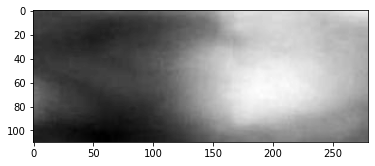

In [ ]:
path = "/content/gdrive/My Drive/MasterThesis/Dataset/ROIs/ROI_FV_USM/001/01_001_01_01.jpg"
image = io.imread(path)
image= color.rgb2grey(image)
plt.imshow(image, cmap='gray')
plt.show()

<class 'numpy.ndarray'>
(110, 280)


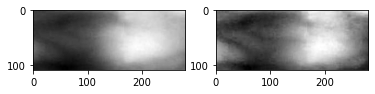

In [ ]:
img = cv.imread(path,0)



# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2, tileGridSize=(3,3))
cl1 = clahe.apply(img)
# cv.imwrite('clahe_2.jpg',cl1)

print(type(cl1))
print(cl1.shape)

plt.subplot(1, 2, 1)
plt.imshow(img,'gray')
plt.subplot(1, 2, 2)
plt.imshow(cl1,'gray')

### ***First Phase***

In [ ]:


# @unique avoid having duplicate labels
@unique
class SensorLabel(Enum):
	SDUMLA = 0
	IDIAP = 1
	FV_USM = 2
	MMCBNU = 3
	PALMAR = 4
	THU_FVFDT = 5
	UTFVP = 6
	HKPU_FV = 7

	def describe(self):
		# self is the member here
		return self.name, self.value

	def __str__(self):
		return str(self.value)

	@classmethod
	def foo(cls):
		# cls here is the enumeration
		return None


# print('Sensor label check %s : '%(SensorLabel.UTFVP.value))
# 	Sensors=SensorLabel()
for name, member in SensorLabel.__members__.items():
	# print(name, 'is memeber of ', member, ' the value is ', str(member.value))
	print('Sensore ',name, ' \t\t   is associated to \t', str(member.value))


Sensore  SDUMLA  		   is associated to 	 0
Sensore  IDIAP  		   is associated to 	 1
Sensore  FV_USM  		   is associated to 	 2
Sensore  MMCBNU  		   is associated to 	 3
Sensore  PALMAR  		   is associated to 	 4
Sensore  THU_FVFDT  		   is associated to 	 5
Sensore  UTFVP  		   is associated to 	 6
Sensore  HKPU_FV  		   is associated to 	 7


In [ ]:


def read_resize_image(path):
  
  img = cv.imread(path,0)
  
  # create a CLAHE object (Arguments are optional).
  # clahe = cv.createCLAHE(clipLimit=12.0, tileGridSize=(8,8))
  clahe = cv.createCLAHE(clipLimit=2, tileGridSize=(3,3))
  img = clahe.apply(img)
  # img = io.imread(path)
  img = color.rgb2gray(img)
  img = img / 255.
  #  Resice image to 256x256
  # resized_img = resize(img,(256,256),mode='constant')
  resized_img = resize(img,(128, 128),mode='constant')
                     
  return resized_img

In [ ]:

class MMCBNU:
  
  num_images=0
  
  def __init__(self):
    self.db_name = 'MMCBNU'
    self.db_type = SensorLabel.MMCBNU.value
    self.abs_path =  PATH.MMCBNU_DATASET_PATH #"/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/MMCBNU_6000/"
    self.organized_data =[]
    self.data_structure =[]
    self.data_loader()
    self.data_organizer()
    


  def data_loader(self):
    # num_images =0
    for root, _, files in os.walk(self.abs_path):
      for file in files:
        abs_img_path = os.path.join(root, file)

        (splitted_path, filename) = os.path.split(abs_img_path)
        (splitted_path, hand) = os.path.split(splitted_path)
        (splitted_path, patient_id) = os.path.split(splitted_path)
        (splitted_path_, Dataset) = os.path.split(splitted_path)
        absolute_path =os.path.join(splitted_path, patient_id ,hand ,filename)
        rel_path=os.path.join(Dataset, patient_id ,hand,filename)
        img =filename
        data =read_resize_image(absolute_path) ####
        Person =patient_id +'_ ' +hand
        self.data_structure.append([self.db_type ,self.num_images ,absolute_path,rel_path ,Dataset ,Person ,img ,data])
        self.num_images =self.num_images +1
    # print(" num_images : ",self.num_images)



  def data_organizer(self):
    for dbType ,index ,abs_path,rel_path ,dbname ,parents_name ,image_name ,data in self.data_structure:
      self.organized_data.append \
      ({'dbType' :dbType ,'index' :index ,'abs_path' :abs_path,'rel_path':rel_path,'dbname' :dbname ,'parents_name' :parents_name
        ,'image_name' :image_name ,'data' :data})
      
      
  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)


In [ ]:
class FV_USM:
  
  num_images=0
  
  def __init__(self):
    self.db_name =  'FV_USM'
    self.db_type = SensorLabel.FV_USM.value
    self.abs_path = PATH.FV_USM_DATASET_PATH # "/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/FV-USM/"
    self.organized_data =[]
    self.data_structure =[]
    self.data_loader()
    self.data_organizer()
    
  def data_loader(self):
    # self.num_images = 0
    for AbsPath, Persons, imgs in os.walk(self.abs_path):
      if not Persons:  # if person is not null
        relPath, Person = os.path.split(AbsPath)
        originPath, Dataset = os.path.split(relPath)
        img_list = list(map(lambda e: e, imgs))
    
        for img in img_list:
          self.num_images = self.num_images + 1
          absolute_path = os.path.join(originPath, Dataset, Person, img)

          rel_path=os.path.join(Dataset, Person, img )
          
          data =read_resize_image(absolute_path) ####
          self.data_structure.append([self.db_type ,self.num_images ,absolute_path,rel_path ,Dataset ,Person ,img ,data])
          self.num_images =self.num_images +1

  def data_organizer(self):
    for dbType ,index ,abs_path,rel_path ,dbname ,parents_name ,image_name ,data in self.data_structure:
      self.organized_data.append \
      ({'dbType' :dbType ,'index' :index ,'abs_path' :abs_path,'rel_path':rel_path,'dbname' :dbname ,'parents_name' :parents_name
        ,'image_name' :image_name ,'data' :data})
      
      
  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)

In [ ]:
class HKPU_FV:
  
  num_images=0
  
  def __init__(self):
    self.db_name =  'HKPU_FV'
    self.db_type = SensorLabel.HKPU_FV.value
    self.abs_path = PATH.HKPU_FV_DATASET_PATH # "/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/HKPU-FV/"
    self.organized_data =[]
    self.data_structure =[]
    self.data_loader()
    self.data_organizer()
    
  def data_loader(self):
    # self.num_images = 0
    for root, _, files in os.walk(self.abs_path):
      for file in files:
        abs_img_path = os.path.join(root, file)
        (splitted_path, Image_name) = os.path.split(abs_img_path)
        (splitted_path, Finger) = os.path.split(splitted_path)
       
        (splitted_path, Hand) = os.path.split(splitted_path)
        (splitted_path, Person_id) = os.path.split(splitted_path)
        (splitted_path, Dataset) = os.path.split(splitted_path)
        rel_path=os.path.join(Dataset, Person_id, Hand, Finger, Image_name )
        absolute_path = os.path.join(splitted_path, Dataset, Person_id, Hand, Finger, Image_name)
        img = Image_name
        data =read_resize_image(absolute_path)
        Person = Person_id + '_' + Hand + '_' + Finger
        self.data_structure.append([self.db_type ,self.num_images ,absolute_path,rel_path, Dataset, Person, img, data])
        self.num_images = self.num_images + 1
          
          
  def data_organizer(self):
    for dbType ,index ,abs_path,rel_path ,dbname ,parents_name ,image_name ,data in self.data_structure:
      self.organized_data.append \
      ({'dbType' :dbType ,'index' :index ,'abs_path' :abs_path,'rel_path':rel_path,'dbname' :dbname ,'parents_name' :parents_name
        ,'image_name' :image_name ,'data' :data})
      
      
  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)

In [ ]:

class SDUMLA:
  cnt=0
  def __init__(self):
    self.db_name = 'SDUMLA'
    self.db_type = SensorLabel.SDUMLA.value
    # print("dbtype : ",self.db_type)
    # self.abs_path = config_roi.SDUMLA_HMT_DATASET_PATH
    self.abs_path = PATH.SDUMLA_HMT_DATASET_PATH # "/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/SDUMLA-HMT"    
    self.organized_data = []
    self.data_structure = []
    self.data_loader()
    self.data_organizer()


  def data_loader(self):
		# cnt = 0
    for root, _, files in os.walk(self.abs_path):
      for file in files:
        abs_img_path = os.path.join(root, file)
        (splitted_path, filename) = os.path.split(abs_img_path)
        (splitted_path, hand) = os.path.split(splitted_path)
        (splitted_path, patient_id) = os.path.split(splitted_path)
        (splitted_path_, Dataset) = os.path.split(splitted_path)
        absolute_path = os.path.join(splitted_path, patient_id, hand, filename)
        rel_path=os.path.join(Dataset, patient_id ,hand,filename)
        img = filename
        data =read_resize_image(absolute_path) 
        Person = patient_id + '_' + hand
        self.data_structure.append([self.db_type, self.cnt, absolute_path,rel_path, Dataset, Person, img, data])
        self.cnt = self.cnt + 1
    # print("num images: ",self.cnt)

  def data_organizer(self):

    for dbType, index, abs_path,rel_path, dbname, parents_name, image_name, data in self.data_structure:
      self.organized_data.append(
        {'dbType': dbType, 'index': index, 'abs_path': abs_path,'rel_path':rel_path, 'dbname': dbname, 'parents_name': parents_name,
          'image_name': image_name, 'data': data})

  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)





In [ ]:



class IDIAP:
  cnt=0
  def __init__(self):
    self.db_name = 'IDIAP'
    self.db_type = SensorLabel.IDIAP.value
    # print("dbtype : ",self.db_type)
    self.abs_path = PATH.IDIAP_REAL_DATASET_PATH # "/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/IDIAP_real"    
    self.organized_data = []
    self.data_structure = []
    self.data_loader()
    self.data_organizer()

  def data_loader(self):
    cnt =0
    for AbsPath ,Persons ,imgs in os.walk(self.abs_path):
      if not Persons  :
        relPath, Person = os.path.split(AbsPath)
        originPath, Dataset = os.path.split(relPath)
        img_list = list(map(lambda e: e, imgs))
        
        for img in img_list:
          cnt =cnt +1
          absolute_path =os.path.join(originPath, Dataset ,Person ,img)
          rel_path=os.path.join(Dataset,Person ,img)
          data =read_resize_image(absolute_path)
          self.data_structure.append([self.db_type ,cnt ,absolute_path,rel_path, Dataset ,Person ,img ,data])

  def data_organizer(self):

    for dbType ,index ,abs_path, rel_path ,dbname ,parents_name ,image_name ,data in self.data_structure:
        self.organized_data.append \
        ({'dbType' :dbType ,'index' :index ,'abs_path' :abs_path, 'rel_path' : rel_path ,'dbname' :dbname ,'parents_name' :parents_name
        ,'image_name' :image_name ,'data' :data})



  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)



In [ ]:




class PALMAR:
  cnt=0
  def __init__(self):
    self.db_name = 'PALMAR'
    self.db_type = SensorLabel.PALMAR.value
    # print("dbtype : ",self.db_type)
    self.abs_path = PATH.PALMAR_DATASET_PATH # "/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/PLUS-FV3-Laser_PALMAR"    
    self.organized_data = []
    self.data_structure = []
    self.data_loader()
    self.data_organizer()

  def data_loader(self):
    cnt = 0
    for AbsPath, Persons, imgs in os.walk(self.abs_path):
      if not Persons:  # if person is not null
        relPath, Person = os.path.split(AbsPath)
        originPath, Dataset = os.path.split(relPath)
        img_list = list(map(lambda e: e, imgs))

        for img in img_list:
          cnt = cnt + 1
          absolute_path = os.path.join(originPath, Dataset, Person, img)
          rel_path = os.path.join(Dataset, Person, img)
          data = np.rot90(read_resize_image(absolute_path), 1)
          self.data_structure.append([self.db_type, cnt, absolute_path, rel_path, Dataset, Person, img, data])
    

  def data_organizer(self):
    for dbType, index, abs_path,rel_path, dbname, parents_name, image_name, data in self.data_structure:
      self.organized_data.append(
        {'dbType': dbType, 'index': index, 'abs_path': abs_path,'rel_path':rel_path, 'dbname': dbname, 'parents_name': parents_name,
         'image_name': image_name, 'data': data})


  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)


In [ ]:
class THU_FVFDT:
  cnt=0
  def __init__(self):
    self.db_name = ''
    self.db_type = SensorLabel.THU_FVFDT.value
    # print("dbtype : ",self.db_type)
    self.abs_path = PATH.THU_FVFDT_DATASET_PATH # "/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/THU-FVFDT"    
    self.organized_data = []
    self.data_structure = []
    self.data_loader()
    self.data_organizer()


  def data_loader(self):
    cnt = 0
    for AbsPath, Persons, imgs in os.walk(self.abs_path):
      if not Persons:  # if person is not null
        relPath, Person = os.path.split(AbsPath)
        originPath, Dataset = os.path.split(relPath)
        img_list = list(map(lambda e: e, imgs))

        for img in img_list:
          cnt = cnt + 1
          absolute_path = os.path.join(originPath, Dataset, Person, img)
          rel_path = os.path.join(Dataset, Person, img)
          data = np.rot90(read_resize_image(absolute_path), 1)
          self.data_structure.append([self.db_type, cnt, absolute_path, rel_path, Dataset, Person, img, data])
    

  def data_organizer(self):
    for dbType, index, abs_path,rel_path, dbname, parents_name, image_name, data in self.data_structure:
      self.organized_data.append(
        {'dbType': dbType, 'index': index, 'abs_path': abs_path,'rel_path':rel_path, 'dbname': dbname, 'parents_name': parents_name,
         'image_name': image_name, 'data': data})


  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)

In [ ]:
class UTFVP:
  cnt=0
  def __init__(self):
    self.db_name = ''
    self.db_type = SensorLabel.UTFVP.value
    self.abs_path = PATH.UTFVP_DATASET_PATH # "/content/gdrive/My Drive/MasterThesis/Dataset/Dataset_full/UTFVP"    
    self.organized_data = []
    self.data_structure = []
    self.data_loader()
    self.data_organizer()

  def data_loader(self):
    cnt = 0
    for AbsPath, Persons, imgs in os.walk(self.abs_path):
      if not Persons:  # if person is not null
        relPath, Person = os.path.split(AbsPath)
        originPath, Dataset = os.path.split(relPath)
        img_list = list(map(lambda e: e, imgs))

        for img in img_list:
          cnt = cnt + 1
          absolute_path = os.path.join(originPath, Dataset, Person, img)
          rel_path = os.path.join(Dataset, Person, img)
          data = np.rot90(read_resize_image(absolute_path), 1)
          self.data_structure.append([self.db_type, cnt, absolute_path, rel_path, Dataset, Person, img, data])
    

  def data_organizer(self):
    for dbType, index, abs_path,rel_path, dbname, parents_name, image_name, data in self.data_structure:
      self.organized_data.append(
        {'dbType': dbType, 'index': index, 'abs_path': abs_path,'rel_path':rel_path, 'dbname': dbname, 'parents_name': parents_name,
         'image_name': image_name, 'data': data})


  def __len__(self):
    return len(self.organized_data)

  def __iter__(self):
    return iter(self.organized_data)

In [ ]:

utfvp= UTFVP()
utfvp_data=utfvp.organized_data
# print(utfvp_data[0])
print('UTFVP :',len(utfvp_data))
df_utfvp = pd.DataFrame(utfvp_data)

idiap= IDIAP()
idiap_data=idiap.organized_data
# print(idiap_data[0])
print('IDIAP :',len(idiap_data))
df_idiap = pd.DataFrame(idiap_data)


hkpu_fv= HKPU_FV()
hkpu_fv_data=hkpu_fv.organized_data
# print(hkpu_fv_data[0])
print('HKPU_FV :',len(hkpu_fv_data))
df_hkpu_fv = pd.DataFrame(hkpu_fv_data)


fvusm=FV_USM()
fvusm_data=fvusm.organized_data
# print(mmc_data[0])
print('FV_USM :',len(fvusm_data))
df_fvusm= pd.DataFrame(fvusm_data)


thu_fvfdt= THU_FVFDT()
thu_fvfdt_data=thu_fvfdt.organized_data
# print(thu_fvfdt_data[0])
print('HKPU_FV :',len(thu_fvfdt_data))
df_thu_fvfdt = pd.DataFrame(thu_fvfdt_data)



mmc=MMCBNU()
mmc_data=mmc.organized_data
# print(mmc_data[0])
print('MMCBNU :',len(mmc_data))
df_mmc = pd.DataFrame(mmc_data)

palmar= PALMAR()
palmar_data=palmar.organized_data
# print(palmar_data[0])
print('HKPU_FV :',len(palmar_data))
df_palmar = pd.DataFrame(palmar_data)

sdumla=SDUMLA()
sdumla_data=sdumla.organized_data
# print(sdumla_data[0])
print('SDUMLA :',len(sdumla_data))
df_sdumla = pd.DataFrame(sdumla_data)

all_data=[df_mmc,df_sdumla,df_palmar,df_thu_fvfdt,df_fvusm,df_hkpu_fv,df_idiap,df_utfvp]

# print('Sensor label check %s : '%(SensorLabel.UTFVP.value))
# 	Sensors=SensorLabel()
for name, member in SensorLabel.__members__.items():
	# print(name, 'is memeber of ', member, ' the value is ', str(member.value))
	print('Sensore ',name, ' \t\t   is associated to \t', str(member.value))



UTFVP : 119
IDIAP : 119
HKPU_FV : 119
FV_USM : 119
HKPU_FV : 119
MMCBNU : 119
HKPU_FV : 119
SDUMLA : 119
Sensore  SDUMLA  		   is associated to 	 0
Sensore  IDIAP  		   is associated to 	 1
Sensore  FV_USM  		   is associated to 	 2
Sensore  MMCBNU  		   is associated to 	 3
Sensore  PALMAR  		   is associated to 	 4
Sensore  THU_FVFDT  		   is associated to 	 5
Sensore  UTFVP  		   is associated to 	 6
Sensore  HKPU_FV  		   is associated to 	 7


In [ ]:
#  result = df1.append(df2)
# result = df1.append([df_mmc,df_sdumla])
data = pd.concat(all_data)

# print(data.head())

print('lent of all data is : ',len(data['index']))

data['index'] = list(range(len(data['index'])))
data.reset_index(inplace=True, drop=True)


lent of all data is :  952


In [ ]:
# df_aggregate.iloc[[220,239],[4,5]]

# print("lent of a new aggregated dataframe is : ",len(data.index))

# df_aggregate['dbname'][df_aggregate['index'] == 119]
# df_aggregate.loc[1,['index','dbname']]
# data.shape
# data.loc[110:150,['index','dbname','image_name']]

data.to_excel(r'/content/gdrive/My Drive/MasterThesis/sourceCode_cropped_Image/ data_image_128.xlsx', index = True)

# df = pd.read_excel (r'/content/drive/My Drive/MasterThesis/sourceCode/ data_image1.xlsx')

In [ ]:
# df = pd.read_excel (r'/content/drive/My Drive/MasterThesis/sourceCode/ data_image2.xlsx')

In [ ]:
# for i in range(len(data.index)):
#   data.loc[i,['index','dbname','image_name']]
  # print(data.loc[i,['image_value']].shape,end=" ")

# data=df
print(data['data'])
print("lent of a new aggregated dataframe is : ",len(data.index))

0      [[0.14964640742557364, 0.18562110651966907, 0....
1      [[0.4814912492731316, 0.5395805359215066, 0.53...
2      [[0.1303931670856983, 0.14663775664638984, 0.1...
3      [[0.15399417917115818, 0.16813500687161684, 0....
4      [[0.4288425277031308, 0.5130831970572469, 0.52...
                             ...                        
947    [[0.8087753485529159, 0.8102870624586392, 0.80...
948    [[0.8643761436558253, 0.8413994380709436, 0.82...
949    [[0.6728409423291516, 0.657580250814043, 0.653...
950    [[0.6352659079500699, 0.6123072480532256, 0.60...
951    [[0.8855432254793807, 0.8857496948333683, 0.88...
Name: data, Length: 952, dtype: object
lent of a new aggregated dataframe is :  952


In [ ]:
data_copy = data.copy()

dataset = data.copy()

X=dataset['data']
y= dataset['dbType']

# train_set = data_copy.sample(frac=0.75, random_state=0)
# test_set = data_copy.drop(train_set.index)

# print ('Training set')
# print (train_set)
# print ('\nTest set')
# print (test_set)
# print ('\nOriginal DataFrame')
# print (data)

X=X.to_numpy()
y=y.to_numpy()


# # Import ImageIO and NumPy
# import imageio
# import numpy as np

# # Read in each 2D image
# im1 = imageio.imread('chest-220.dcm')
# im2 = imageio.imread('chest-221.dcm')
# im3 = imageio.imread('chest-222.dcm')

# # Stack images into a volume
# vol = np.stack([im1,im2,im3],axis=2)
# print('Volume dimensions:', vol.shape)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [ ]:
# y_test=y_test.to_numpy()
# X_train=X_train.to_numpy()
# X_test=X_test.to_numpy()
# y_train=y_train.to_numpy()

In [ ]:
print('len of X_test :',len(X_test))
print('len of y_test:',len(y_test))

print('len of X_train:',len(X_train))
print('len of y_train:',len(y_train))


# X_test[10]

stack_X_train=[]
for im in  X_train:
  stack_X_train.append(im)

# print('X_train: ' ,im.shape)


st_X_train = np.stack(stack_X_train,axis=0)

# Add a dummy channel dimension
X_train = st_X_train[ ..., np.newaxis]
print('X_train dimensions:', X_train.shape)


stack_y_train=[]
for im in y_train:
  stack_y_train.append(im)
y_train = np.stack(stack_y_train,axis=0)
print('y_train dimensions:', y_train.shape)







len of X_test : 286
len of y_test: 286
len of X_train: 666
len of y_train: 666
X_train dimensions: (666, 128, 128, 1)
y_train dimensions: (666,)


In [ ]:
stack_X_test=[]
for d in X_test:
  stack_X_test.append(d)
# print('X_test: ',d.shape)
st_X_test = np.stack(stack_X_test,axis=0)
# Add a dummy channel dimension
X_test = st_X_test[ ..., np.newaxis]
print('X_test dimensions:', X_test.shape)


stack_y_test=[]
for im in y_test:
  stack_y_test.append(im)
# print('y_test: ' ,im.shape)
y_test = np.stack(stack_y_test,axis=0)
print('y_train dimensions:', y_test.shape)



X_test dimensions: (286, 128, 128, 1)
y_train dimensions: (286,)


In [ ]:
y_train

array([3, 1, 5, 4, 5, 5, 3, 7, 0, 6, 5, 0, 3, 5, 1, 6, 6, 1, 0, 2, 7, 7,
       2, 4, 5, 1, 1, 2, 5, 1, 2, 2, 4, 2, 4, 3, 2, 1, 3, 4, 5, 5, 0, 7,
       5, 1, 0, 1, 7, 6, 2, 5, 7, 1, 6, 6, 0, 2, 5, 3, 6, 1, 2, 1, 4, 6,
       1, 6, 2, 3, 7, 3, 2, 7, 2, 3, 3, 1, 0, 2, 1, 5, 7, 1, 0, 2, 7, 3,
       5, 6, 4, 7, 3, 2, 2, 3, 6, 5, 2, 3, 6, 5, 6, 5, 6, 2, 3, 2, 1, 6,
       6, 5, 6, 4, 2, 6, 6, 1, 0, 1, 1, 0, 7, 7, 7, 2, 5, 2, 3, 7, 6, 5,
       7, 0, 5, 1, 5, 5, 4, 4, 2, 7, 6, 4, 7, 0, 1, 3, 6, 6, 4, 4, 0, 3,
       4, 5, 3, 7, 7, 6, 6, 0, 7, 3, 7, 1, 4, 2, 6, 7, 2, 6, 2, 2, 1, 4,
       6, 1, 6, 4, 1, 6, 2, 6, 5, 6, 4, 2, 7, 4, 4, 5, 5, 4, 0, 4, 7, 2,
       4, 0, 0, 2, 1, 5, 6, 4, 4, 6, 2, 0, 1, 2, 7, 1, 4, 3, 2, 2, 2, 0,
       3, 5, 5, 1, 4, 4, 0, 0, 1, 1, 7, 5, 0, 5, 7, 6, 3, 0, 7, 3, 3, 5,
       3, 7, 1, 0, 7, 3, 6, 2, 0, 2, 5, 5, 7, 4, 0, 7, 7, 5, 7, 7, 6, 6,
       4, 3, 4, 7, 7, 6, 0, 2, 0, 1, 4, 1, 3, 4, 5, 4, 1, 1, 1, 0, 7, 4,
       5, 1, 3, 1, 5, 5, 1, 3, 6, 1, 3, 2, 0, 2, 7,

In [ ]:

def get_model(wd,rate):
  
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding= 'SAME' ,activation='relu', input_shape=(128,128, 1),data_format='channels_last'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3),padding= 'SAME' ,activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3),padding= 'SAME' , activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3),padding= 'SAME' ,activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3, 3),padding= 'SAME' ,activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3),padding= 'SAME' ,activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3),padding= 'SAME' ,activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), strides=(2,2)))


  model.add(Conv2D(256, (3, 3),activation='relu')) # 512
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3) ,activation='relu')) # 512

  # model.add(Conv2D(512, (3, 3),activation='relu'))

  model.add(BatchNormalization())
  model.add(MaxPooling2D((4,4), strides=(2,2)))


  # model.add(Conv2D(512, (3, 3),padding= 'SAME' ,activation='relu'))

  # model.add(Conv2D(512, (3, 3),padding= 'SAME' ,activation='relu'))

  # model.add(Conv2D(512, (3, 3),padding= 'SAME' ,activation='relu'))

  # model.add(MaxPooling2D((7,7), strides=(2,2)))


  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(4096))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(4096))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(8, activation='softmax'))
  return model



In [ ]:
# model summary

# model.summary()

In [ ]:
# function to get the model

# model = get_model(X_train.shape)
model = get_model(1e-5, 0.3)


In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       7

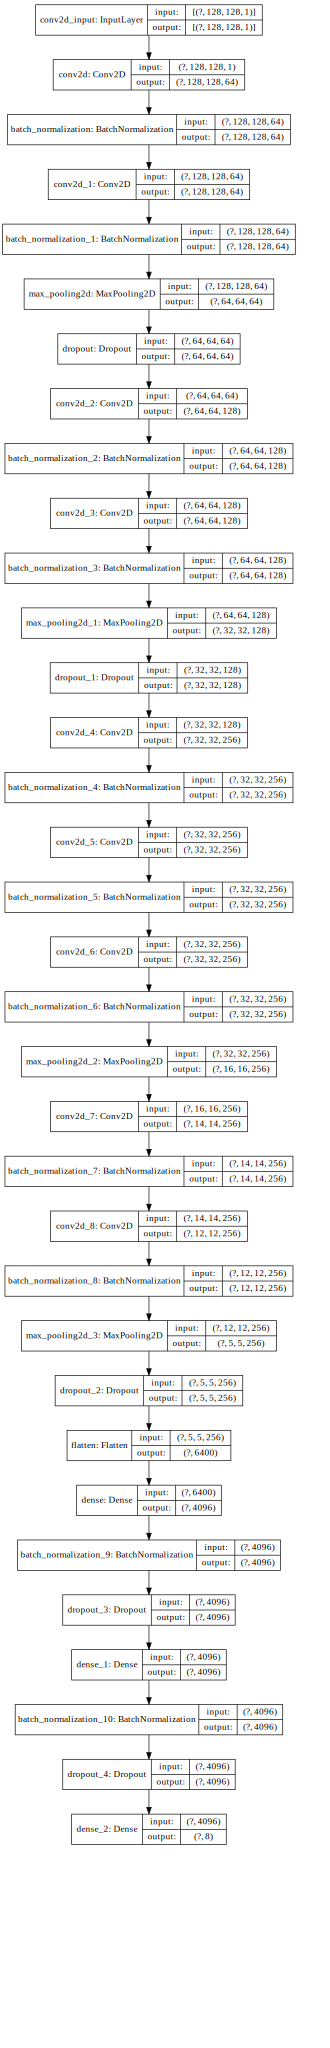

In [ ]:


SVG(model_to_dot(model,show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:


def compile_model(model):

  
    model.compile ( optimizer= 'adam'  , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'] )

In [ ]:


compile_model(model)

In [ ]:
def train_model(model, scaled_train_images, train_labels):

    history = model.fit(X_train,y_train,validation_split=0.15,epochs=100,batch_size=32)
    return history




In [ ]:



history = train_model(model, X_train, y_train)

Epoch 1/100
18/18 [==============================] - 4s 214ms/step - loss: 5.0727 - accuracy: 0.6042 - val_loss: 8.8157 - val_accuracy: 0.4500
Epoch 2/100
18/18 [==============================] - 2s 127ms/step - loss: 1.5024 - accuracy: 0.8039 - val_loss: 48.4178 - val_accuracy: 0.1700
Epoch 3/100
18/18 [==============================] - 2s 126ms/step - loss: 1.3180 - accuracy: 0.8092 - val_loss: 22.9456 - val_accuracy: 0.1200
Epoch 4/100
18/18 [==============================] - 2s 127ms/step - loss: 0.7697 - accuracy: 0.8569 - val_loss: 26.6920 - val_accuracy: 0.1200
Epoch 5/100
18/18 [==============================] - 2s 127ms/step - loss: 0.6384 - accuracy: 0.8746 - val_loss: 14.0785 - val_accuracy: 0.1300
Epoch 6/100
18/18 [==============================] - 2s 128ms/step - loss: 0.4938 - accuracy: 0.8869 - val_loss: 17.7779 - val_accuracy: 0.1200
Epoch 7/100
18/18 [==============================] - 2s 128ms/step - loss: 0.4189 - accuracy: 0.9134 - val_loss: 11.1314 - val_accuracy: 

In [ ]:


frame = pd.DataFrame(history.history)

In [ ]:
frame

,loss,accuracy,val_loss,val_accuracy
0,5.072747,0.604240,8.815696,0.45
1,1.502420,0.803887,48.417824,0.17
2,1.318019,0.809187,22.945642,0.12
3,0.769733,0.856890,26.691980,0.12
4,0.638383,0.874558,14.078455,0.13
...,...,...,...,...
95,0.056541,0.991166,4.494380,0.74
96,0.171572,0.977032,2.146455,0.89
97,0.062982,0.985866,1.317239,0.92
98,0.009773,0.994700,1.210303,0.91


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

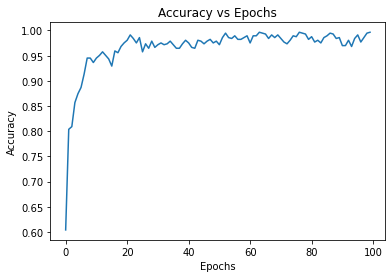

In [ ]:
#  Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

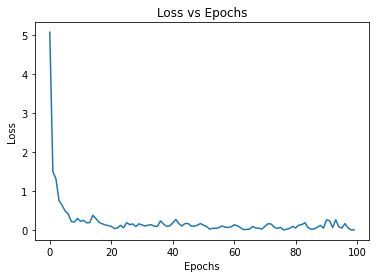

In [ ]:
# Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

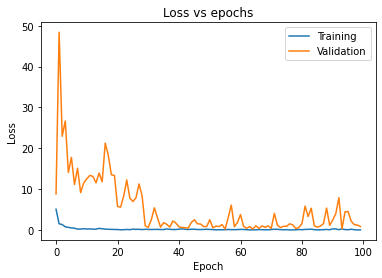

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


# frame = pd.DataFrame(history.history)
# epochs = np.arange(len(frame))

# fig = plt.figure(figsize=(12,4))

# # Loss plot
# ax = fig.add_subplot(121)
# ax.plot(epochs, frame['loss'], label="Train")
# ax.plot(epochs, frame['val_loss'], label="Validation")
# ax.set_xlabel("Epochs")
# ax.set_ylabel("Loss")
# ax.set_title("Loss vs Epochs")
# ax.legend()


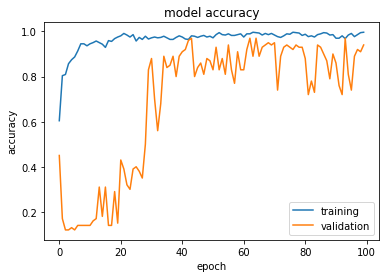

In [ ]:
# loss	accuracy	val_loss	val_accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:


def evaluate_model(model, X_test, y_test):

    tesy_loss,test_acc = model.evaluate(X_test, y_test,verbose=2)
    
    return tesy_loss,test_acc
    

In [ ]:


test_loss, test_accuracy = evaluate_model(model, X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

9/9 - 1s - loss: 0.8330 - accuracy: 0.9336
Test loss: 0.832967221736908
Test accuracy: 0.9335664510726929


### ***Second Phase***

In [ ]:
# from tensorflow.keras.models import Sequential, save_model, load_model

# # Save the model
# filepath = '/content/gdrive/My Drive/MasterThesis/sourceCode_cropped_Image/saved_model'
# save_model(model, filepath)

from keras.models import load_model

model.save('/content/gdrive/My Drive/MasterThesis/sourceCode_cropped_Image/croppedimage_128_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('/content/gdrive/My Drive/MasterThesis/sourceCode_cropped_Image/croppedimage_128_model.h5')

In [ ]:
model = load_model('/content/gdrive/My Drive/MasterThesis/sourceCode_cropped_Image/croppedimage_128_model.h5')

In [ ]:
model